In [18]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/home/brandon-ism/Documents/org/courses/c542/project/data/data_clean.csv')

# Display the first few rows and summary statistics
display(data.head())
display(data.info())
display(data.describe())


,ID,Age,Gender,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep efficiency
0,1,65,0,6.0,18,70,12,0.0,0.0,0.0,1,3.0,0.88
1,2,69,1,7.0,19,28,53,3.0,0.0,3.0,1,3.0,0.66
2,3,40,0,8.0,20,70,10,1.0,0.0,0.0,0,3.0,0.89
3,4,40,0,6.0,23,25,52,3.0,50.0,5.0,1,1.0,0.51
4,5,57,1,8.0,27,55,18,3.0,0.0,3.0,0,3.0,0.76


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    int64  
 3   Sleep duration          452 non-null    float64
 4   REM sleep percentage    452 non-null    int64  
 5   Deep sleep percentage   452 non-null    int64  
 6   Light sleep percentage  452 non-null    int64  
 7   Awakenings              452 non-null    float64
 8   Caffeine consumption    452 non-null    float64
 9   Alcohol consumption     452 non-null    float64
 10  Smoking status          452 non-null    int64  
 11  Exercise frequency      452 non-null    float64
 12  Sleep efficiency        452 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 46.0 KB


None

,ID,Age,Gender,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep efficiency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,40.285398,0.504425,7.465708,22.615044,52.823009,24.561947,1.612832,23.727876,1.911504,0.340708,2.099558,0.788916
std,130.625419,13.172250,0.500534,0.866625,3.525963,15.654235,15.313665,1.332891,29.355363,4.429907,0.474472,3.013834,0.135237
min,1.000000,9.000000,0.000000,5.000000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,113.750000,29.000000,0.000000,7.000000,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.697500
50%,226.500000,40.000000,1.000000,7.500000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,0.000000,2.000000,0.820000
75%,339.250000,52.000000,1.000000,8.000000,25.000000,63.000000,32.500000,3.000000,50.000000,3.000000,1.000000,3.000000,0.900000
max,452.000000,69.000000,1.000000,10.000000,30.000000,75.000000,63.000000,4.000000,200.000000,25.000000,1.000000,25.000000,0.990000


## Correlation Analysis

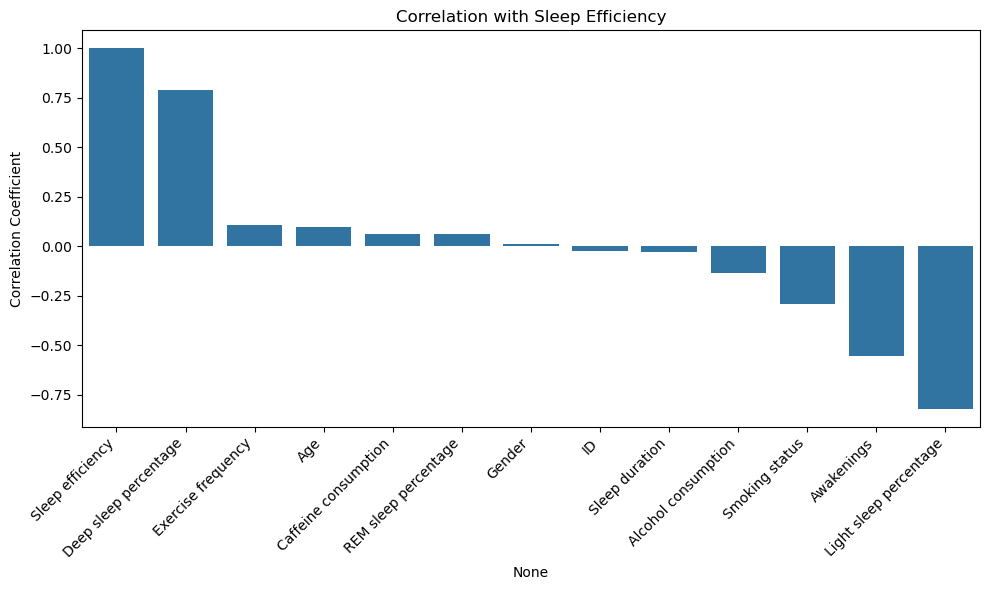

Sleep efficiency          1.000000
Deep sleep percentage     0.787335
Exercise frequency        0.108361
Age                       0.098357
Caffeine consumption      0.062904
REM sleep percentage      0.062362
Gender                    0.010062
ID                       -0.025624
Sleep duration           -0.027467
Alcohol consumption      -0.133364
Smoking status           -0.290026
Awakenings               -0.552179
Light sleep percentage   -0.819204
Name: Sleep efficiency, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = data.corr()

# Extract correlations with the target variable (Sleep Efficiency)
target_correlation = correlation_matrix['Sleep efficiency'].sort_values(ascending=False)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation with Sleep Efficiency')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('/home/brandon-ism/Documents/org/courses/c542/project/figs/correlation_analysis.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Print correlations for reference
print(target_correlation)




## Redundancy Check

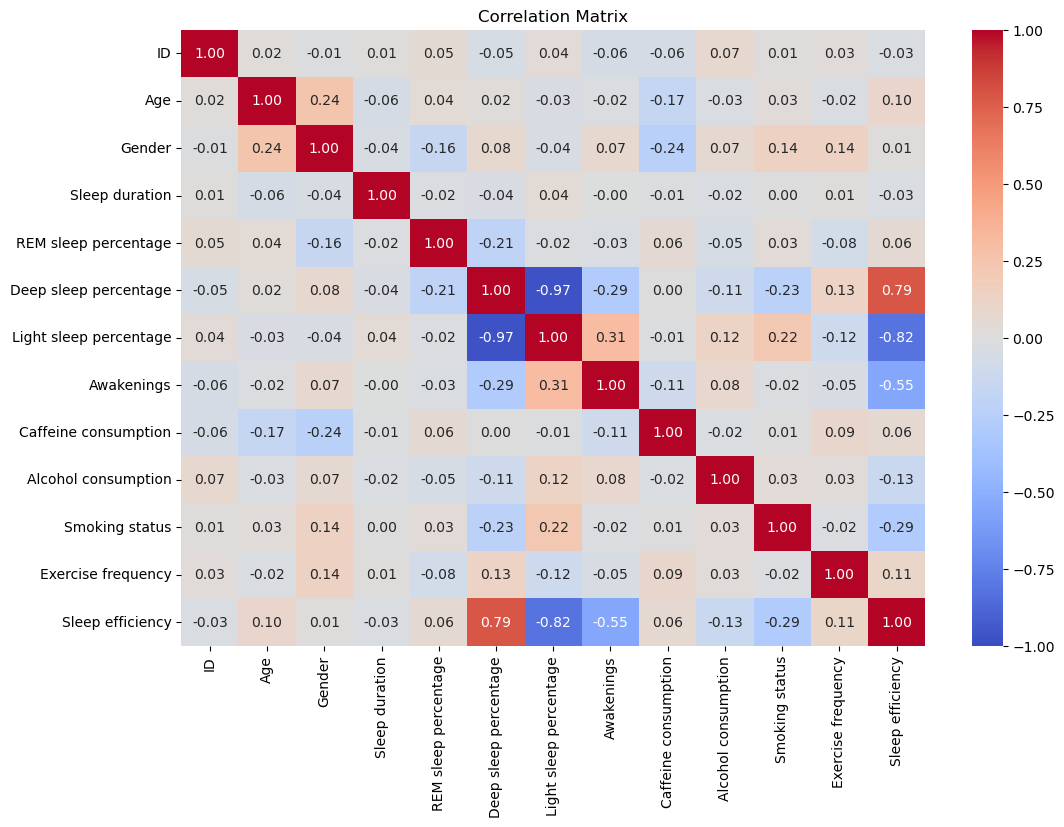

Highly Correlated Features (Threshold > 0.75):
('Light sleep percentage', 'Deep sleep percentage')
('Sleep efficiency', 'Deep sleep percentage')
('Sleep efficiency', 'Light sleep percentage')


In [20]:
# Visualize the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('/home/brandon-ism/Documents/org/courses/c542/project/figs/correlation_matrix.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Set a threshold for high correlation
correlation_threshold = 0.75

# Identify pairs of highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Display the pairs of features with high correlation
print("Highly Correlated Features (Threshold > 0.75):")
for pair in high_corr_pairs:
    print(pair)
    
    



## Feature Importance Using Random Forest

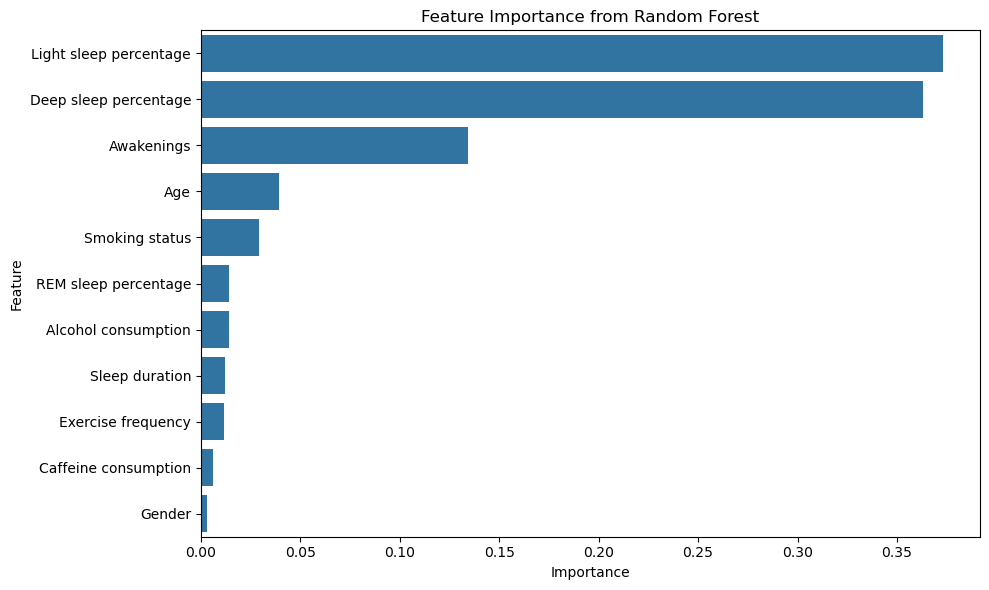

                   Feature  Importance
5   Light sleep percentage    0.373051
4    Deep sleep percentage    0.363003
6               Awakenings    0.134294
0                      Age    0.039074
9           Smoking status    0.029434
3     REM sleep percentage    0.014109
8      Alcohol consumption    0.014051
2           Sleep duration    0.012000
10      Exercise frequency    0.011539
7     Caffeine consumption    0.006263
1                   Gender    0.003180


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['Sleep efficiency', 'ID'])  # Drop target and irrelevant identifier
y = data['Sleep efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.savefig('/home/brandon-ism/Documents/org/courses/c542/project/figs/feature_importance_random_forest.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Display feature importance for reference
print(feature_importances)


## Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize a Linear Regression model
lr = LinearRegression()

# Apply Recursive Feature Elimination
rfe = RFE(estimator=lr, n_features_to_select=5)  
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

# Visualize feature rankings
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("Feature Rankings:")
print(feature_ranking)


Selected Features:
Index(['Gender', 'Sleep duration', 'Light sleep percentage', 'Awakenings',
       'Smoking status'],
      dtype='object')
Feature Rankings:
                   Feature  Ranking
1                   Gender        1
2           Sleep duration        1
5   Light sleep percentage        1
6               Awakenings        1
9           Smoking status        1
3     REM sleep percentage        2
4    Deep sleep percentage        3
8      Alcohol consumption        4
0                      Age        5
7     Caffeine consumption        6
10      Exercise frequency        7


## Mutual Information

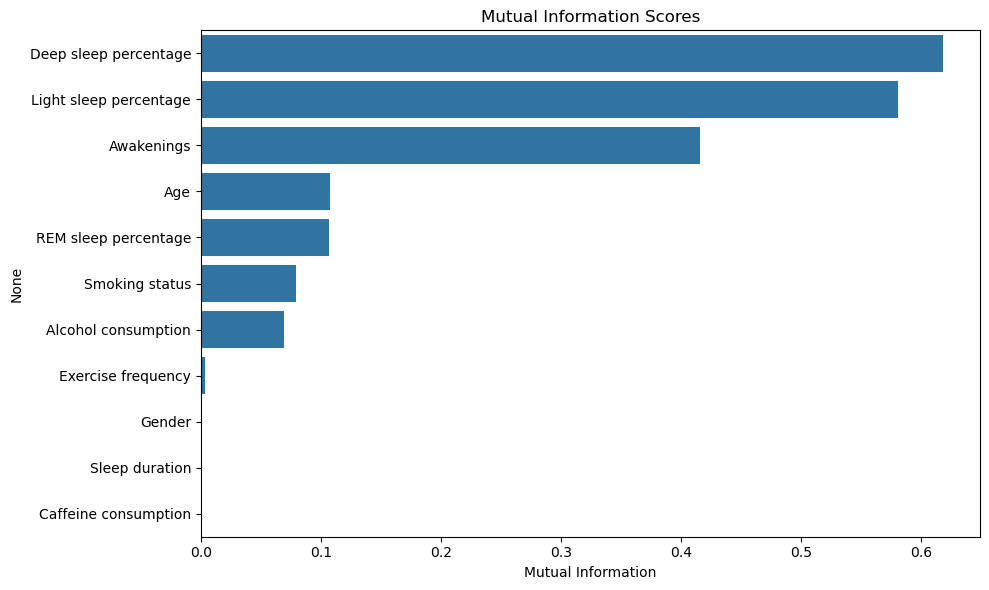

Deep sleep percentage     0.618348
Light sleep percentage    0.580965
Awakenings                0.416146
Age                       0.107285
REM sleep percentage      0.106541
Smoking status            0.079580
Alcohol consumption       0.069554
Exercise frequency        0.003502
Gender                    0.000000
Sleep duration            0.000000
Caffeine consumption      0.000000
dtype: float64


In [23]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information
mi = mutual_info_regression(X_train, y_train, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Plot mutual information scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores.values, y=mi_scores.index)
plt.title('Mutual Information Scores')
plt.xlabel('Mutual Information')
plt.tight_layout()
plt.savefig('/home/brandon-ism/Documents/org/courses/c542/project/figs/mutual_info.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Display scores for reference
print(mi_scores)


### Here, we consolidate our findings

In [24]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Extract correlations with the target variable
target_correlation = correlation_matrix['Sleep efficiency'].sort_values(ascending=False)
print("Correlation with Sleep Efficiency:")
print(target_correlation)

# Consider features with |correlation| > 0.5
correlated_features = target_correlation[abs(target_correlation) > 0.5].index.tolist()
print("\nHighly Correlated Features (|correlation| > 0.5):")
print(correlated_features)

###

from sklearn.feature_selection import mutual_info_regression

# Define features and target
X = data.drop(columns=['Sleep efficiency', 'ID'])  # Drop target and irrelevant identifier
y = data['Sleep efficiency']

# Compute mutual information
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\nMutual Information Scores:")
print(mi_series)

# Select features with MI score > threshold (e.g., 0.1)
mi_selected_features = mi_series[mi_series > 0.1].index.tolist()
print("\nFeatures with MI > 0.1:")
print(mi_selected_features)

###

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize a Linear Regression model
lr = LinearRegression()

# Apply Recursive Feature Elimination
rfe = RFE(estimator=lr, n_features_to_select=5)  # Choose the number of features to keep
rfe.fit(X, y)

# Get selected features
rfe_selected_features = X.columns[rfe.support_].tolist()
print("\nSelected Features by RFE:")
print(rfe_selected_features)

# Get feature rankings
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')
print("\nRFE Rankings:")
print(rfe_ranking)

###

from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Extract feature importance
rf_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importances:")
print(rf_feature_importances)

# Select features with importance > threshold (e.g., 0.05)
rf_selected_features = rf_feature_importances[rf_feature_importances['Importance'] > 0.05]['Feature'].tolist()
print("\nFeatures with Importance > 0.05:")
print(rf_selected_features)


Correlation with Sleep Efficiency:
Sleep efficiency          1.000000
Deep sleep percentage     0.787335
Exercise frequency        0.108361
Age                       0.098357
Caffeine consumption      0.062904
REM sleep percentage      0.062362
Gender                    0.010062
ID                       -0.025624
Sleep duration           -0.027467
Alcohol consumption      -0.133364
Smoking status           -0.290026
Awakenings               -0.552179
Light sleep percentage   -0.819204
Name: Sleep efficiency, dtype: float64

Highly Correlated Features (|correlation| > 0.5):
['Sleep efficiency', 'Deep sleep percentage', 'Awakenings', 'Light sleep percentage']

Mutual Information Scores:
Deep sleep percentage     0.593334
Light sleep percentage    0.559820
Awakenings                0.413011
REM sleep percentage      0.176872
Age                       0.116568
Alcohol consumption       0.091486
Smoking status            0.085166
Exercise frequency        0.080468
Caffeine consumption      

In [ ]:
# Combine features from all methods
final_selected_features = set(correlated_features + mi_selected_features + rfe_selected_features + rf_selected_features)

# Check consensus among methods
print("\nFinal Selected Features:")
print(final_selected_features)

selected_features = ['Light sleep percentage', 'Awakenings', 'Smoking status', 'Deep sleep percentage']
print("\nFinal Features for Model Training:")
print(selected_features)




Final Selected Features:
{'REM sleep percentage', 'Deep sleep percentage', 'Sleep efficiency', 'Light sleep percentage', 'Smoking status', 'Awakenings', 'Gender', 'Age'}

Final Features for Model Training:
['Light sleep percentage', 'Awakenings', 'Smoking status', 'Deep sleep percentage']


# Feature Selection Explanation

## Final Selected Features
The final features selected for model training are:
- **Light Sleep Percentage**
- **Awakenings**
- **Smoking Status**
- **Deep Sleep Percentage**

### 1. Light Sleep Percentage
- **Correlation Analysis**: Strong negative correlation (-0.82) with **Sleep Efficiency**, indicating that higher light sleep negatively impacts efficiency.
- **Mutual Information**: High MI score, showing a significant dependency on the target variable.
- **RFE and Random Forest**: Ranked as one of the top features in both methods.
- **Domain Knowledge**: Light sleep is less restorative compared to deep sleep and REM sleep, which justifies its negative impact on sleep efficiency.
- **Final Decision**: Keep this feature as it's highly significant and directly linked to the target.

### 2. Awakenings
- **Correlation Analysis**: Moderately strong negative correlation (-0.55), indicating that frequent awakenings reduce sleep efficiency.
- **Mutual Information**: High MI score, reinforcing its dependency on sleep efficiency.
- **RFE and Random Forest**: Consistently ranked among the top features.
- **Domain Knowledge**: Awakenings disrupt sleep cycles, leading to reduced sleep quality and efficiency.
- **Final Decision**: Keep this feature as it is crucial for understanding sleep disruptions.

### 3. Smoking Status
- **Correlation Analysis**: Moderate negative correlation (-0.29) with sleep efficiency.
- **Mutual Information**: Highlighted as moderately important.
- **RFE and Random Forest**: Ranked among the top features.
- **Domain Knowledge**: Smoking is associated with poor sleep quality due to its impact on lung function, circulation, and sleep disruptions.
- **Final Decision**: Keep this feature as it provides an important behavioral factor influencing sleep efficiency.

### 4. Deep Sleep Percentage
- **Correlation Analysis**: Strong positive correlation (+0.79) with sleep efficiency, indicating that more deep sleep improves efficiency.
- **Mutual Information**: High MI score, showing dependency on the target variable.
- **RFE and Random Forest**: Ranked slightly lower in RFE but still significant in Random Forest.
- **Domain Knowledge**: Deep sleep is the most restorative sleep phase and directly impacts overall sleep efficiency.
- **Final Decision**: Keep this feature due to its strong biological relevance and statistical significance.

---

## Features Not Included
1. **REM Sleep Percentage**:
   - Moderate importance in MI and correlation analysis but lower rankings in RFE and Random Forest.
   - Domain knowledge suggests REM is less directly related to sleep efficiency than deep sleep.

2. **Sleep Duration**:
   - Weak correlation with sleep efficiency (-0.03).
   - Despite its general relevance to sleep, the dataset shows it is not a strong predictor of efficiency in this context.

3. **Gender and Age**:
   - Weak correlations and low importance across all methods.
   - Minimal direct biological relevance to sleep efficiency in the dataset.

4. **Alcohol Consumption, Caffeine Consumption, and Exercise Frequency**:
   - Low rankings in all methods.
   - These are secondary lifestyle factors with weaker direct influence on sleep efficiency compared to the retained features.

---

These decisions were made based on the combination of statistical evidence and real-world sleep science, ensuring a balance between model interpretability and performance.
